<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

Is there a relationship between the age of a player and the minutes that the player plays?

    * $H_0$: There is no relationship between a player's age and the minutes that a player plays in a season.
    * $H_1$: A player is significantly more likely to play more minutes if they are older.

#### Analysis

In [248]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import math
import scipy.stats as stats
from __future__ import print_function, division
import functions
import numpy as np

In [249]:
age_min=pd.read_csv('football_players_age_and_minutes.csv')
age_min.head()

,age,min_per_match
0,28,90
1,29,74
2,25,87
3,24,89
4,25,53


In [250]:
age_mean=round(age_min['age'].mean(),0)

In [251]:
age_min['age_category']=age_min['age'].apply(lambda x: 1 if x >= age_mean else 0 )
age_min.head()

,age,min_per_match,age_category
0,28,90,1
1,29,74,1
2,25,87,0
3,24,89,0
4,25,53,0


In [252]:
old=age_min.loc[age_min['age_category']==1]
young=age_min.loc[age_min['age_category']==0]
print(len(old), len(young))

284 216


In [253]:
sample_old_min=sampling_selecting(old, 100, 'min_per_match')
sample_young_min=sampling_selecting(young, 100, 'min_per_match')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


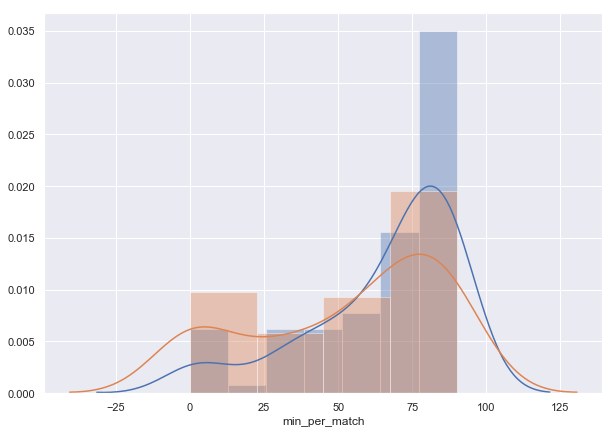

In [254]:
sns.distplot(sample_old_min)
sns.distplot(sample_young_min)

In [255]:
tt_results1=stats.ttest_ind(sample_old_min, sample_young_min)

In [256]:
t1 = tt_results1.statistic

In [257]:
df1=welch_dof(sample_young_min,sample_old_min)

NameError: name 'welch_dof' is not defined

In [ ]:
t_critical1=1.653

In [ ]:
title='H2'

In [ ]:
make_t_dist(t1, t_critical1, df1, 'H2')

In [ ]:
    x_size = np.linspace(-5, 5, 200)

    y_size = stats.t.pdf(x_size, df1, 0, 1)

    fig = plt.figure(figsize=(8,5))

    ax = fig.gca()

    ax.plot(x_size, y_size, linewidth=3, color='darkblue')

    # plot a vertical line for our measured difference in rates t-statistic
    ax.axvline(t1, color='yellow', linestyle='--', lw=2,label='t-statistic')
    ax.axvline(t_critical1, color='purple', linestyle='--', lw=2, label='critical t-value')
    ax.fill_betweenx(y_size, x_size, t_critical1, where = x_size>t_critical1)
    ax.legend()
    plt.show()

In [ ]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [ ]:
Cohen_d(sample_old_min, sample_young_min)

In [ ]:
national_performance=pd.read_csv('football_players_by_nationality_and_goals.csv')
national_performance.head()

In [ ]:
national=national_performance.loc[national_performance['nationality']=='England']
national_pos=national.loc[(national['position']=='Midfielder')|(national['position']=='Forward')]
foreign=national_performance.loc[national_performance['nationality']!='England']
foreign_pos=foreign.loc[(foreign['position']=='Midfielder')|(foreign['position']=='Forward')]

In [ ]:
print(len(national_pos), len(foreign_pos))

In [ ]:
sample_nat_goals=sampling_selecting(national_pos, 60, 'goals_overall')
sample_for_goals=sampling_selecting(national_pos, 60, 'goals_overall')

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(sample_nat_goals)
sns.distplot(sample_for_goals) 

In [ ]:
tt_results = stats.ttest_ind(sample_nat_goals, sample_for_goals, equal_var=False)

In [ ]:
t = tt_results.statistic

In [ ]:
df = welch_dof(sample_nat_goals,sample_for_goals)

In [ ]:
t_critical = 1.658

In [ ]:
x_size = np.linspace(-5, 5, 200)

y_size = stats.t.pdf(x_size, df, 0, 1)

fig = plt.figure(figsize=(8,5))

ax = fig.gca()

ax.plot(x_size, y_size, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='yellow', linestyle='--', lw=2,label='t-statistic')
ax.axvline(t_critical, color='purple', linestyle='--', lw=2, label='critical t-value')
ax.fill_betweenx(y_size, x_size, t_critical, where = x_size>t_critical)
ax.legend()
plt.show()

In [ ]:
Cohen_d(sample_for_goals, sample_nat_goals)

#### Findings & Application

#### Limitations

#### Next Steps